In [15]:
import jax
import jax.numpy as jnp
import numpy as np
from jax import config
config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

In [155]:
M = np.zeros((2,2,2,2),dtype=jnp.complex128)
M[0,0,1,0] = 1.0
M[0,0,0,1] = 1.0
M[0,0,1,1] = 1.0
M[1,1,0,0] = 1.0
M[1,0,0,0] = 1.0
M[0,1,0,0] = 1.0
M = jnp.array(M)

Mg = np.zeros((2,2,2,2),dtype=jnp.complex128)
Mg[0,0,1,0] = 1.0
Mg[0,0,0,1] = 1.0
Mg[0,1,0,0] = 1.0
Mg[1,0,0,0] = 1.0
Mg = jnp.array(Mg)

Mr = np.random.rand(2,2,2,2)
Mr = jnp.array(Mr)

In [156]:
def expand(H0,M):
    D,chi = H0.shape[0:2]
    H = jnp.reshape(jnp.einsum('ijkl,kpmn->ijpmln',H0,M),(D,chi*D,D,chi*D))
    return H

In [157]:
def measure(vector,L):
    nmatrix = jax.vmap(lambda n: jnp.arange(2**L)//2**n % 2)(jnp.arange(L))
    return nmatrix @ jnp.abs(vector)**2

In [158]:
def plotspec(M,L,bc,mode=1):
    H = jnp.einsum("ij,jklm->iklm",bc,M)
    for i in range(L-1):
        H = expand(H,M)
    H = jnp.einsum("ijil->jl",H)

    w,v = jnp.linalg.eig(H)
    for m in range(mode):
        plt.plot(np.arange(L), measure(v[:,m],L),'-',label="{}-th".format(m))
    plt.legend()
    plt.show()

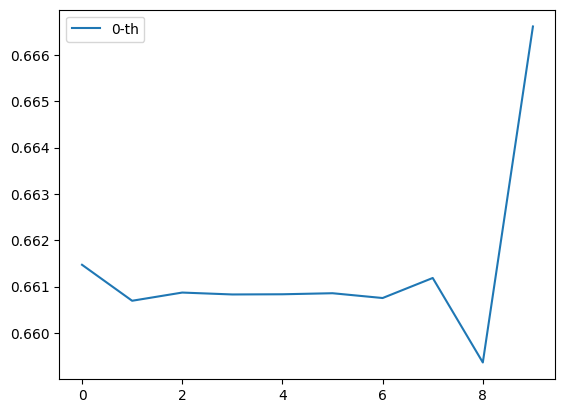

In [162]:
plotspec(Mr,10,np.array([[1.0,0.0],[1.0,1.0]]),mode=1)